# Analysis Data Indonesian Hate Speech Tweet
## About this data
* **HS** : hate speech label;
* **Abusive** : abusive language label;
* **HS_Individual** : hate speech targeted to an individual;
* **HS_Group** : hate speech targeted to a group;
* **HS_Religion** : hate speech related to religion/creed;
* **HS_Race** : hate speech related to race/ethnicity;
* **HS_Physical** : hate speech related to physical/disability;
* **HS_Gender** : hate speech related to gender/sexual orientation;
* **HS_Gender** : hate related to other invective/slander;
* **HS_Weak** : weak hate speech;
* **HS_Moderate** : moderate hate speech;
* **HS_Strong** : strong hate speech.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from wordcloud import WordCloud


## Read data dari database

In [2]:
conn = sqlite3.connect('challenge_database.db')

df = pd.read_sql_query('''
    SELECT * FROM tweet_table;
    ''', conn)

conn.commit()
conn.close()

In [3]:
conn = sqlite3.connect('challenge_database.db')

df_abusive = pd.read_sql_query('''
    SELECT * FROM abusive_table;
    ''', conn)

conn.commit()
conn.close()

In [4]:
conn = sqlite3.connect('challenge_database.db')

kamus_alay = pd.read_sql_query('''
    SELECT * FROM kamus_alay_table;
    ''', conn)

conn.commit()
conn.close()

In [5]:
abusive_list = df_abusive.abusive.values.tolist()
abusive_list

['alay',
 'ampas',
 'buta',
 'keparat',
 'anjing',
 'anjir',
 'babi',
 'bacot',
 'bajingan',
 'banci',
 'bandot',
 'buaya',
 'bangkai',
 'bangsat',
 'bego',
 'bejat',
 'bencong',
 'berak',
 'bisu',
 'celeng',
 'jancuk',
 'bodoh',
 'berengsek',
 'budek',
 'burik',
 'jamban',
 'cocot',
 'congor',
 'culun',
 'cupu',
 'dongok',
 'dungu',
 'edan',
 'tai',
 'ngewe',
 'geblek',
 'gembel',
 'gila',
 'goblok',
 'iblis',
 'idiot',
 'jablay',
 'jembud',
 'jembut',
 'jijik',
 'kacrut',
 'kafir',
 'modar',
 'kampang',
 'kampret',
 'kampungan',
 'kimak',
 'kontol',
 'kunti',
 'tuyul',
 'kunyuk',
 'mampus',
 'memek',
 'monyet',
 'najis',
 'nete',
 'ngentot',
 'noob',
 'pecun',
 'perek',
 'sampah',
 'sarap',
 'setan',
 'silit',
 'bokong',
 'sinting',
 'sompret',
 'sontoloyo',
 'terkutuk',
 'titit',
 'pantat',
 'tolol',
 'udik',
 'antek',
 'asing',
 'ateis',
 'sitip',
 'autis',
 'picek',
 'ayam kampus',
 'bani kotak',
 'bispak',
 'bisyar',
 'bokep',
 'bong',
 'cacat',
 'cct',
 'cebong',
 'taplak',
 'cu

## EDA

In [6]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Cleaned
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua berusaha melacak gue kamu lantas remehka...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,telat memberi tau kamu sarap gue bergaul cigax...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 aku berpikir aku tetap tuhan aku selalu jat...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tau matamu sipit mana aku
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir awal tambah dungu haha


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
 13  Tweet_Cleaned  13169 non-null  object
dtypes: int64(12), object(2)
memory usage: 1.4+ MB


In [8]:
df.shape

(13169, 14)

In [9]:
df.duplicated().sum()

125

In [10]:
df = df.drop_duplicates()
df


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Cleaned
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua berusaha melacak gue kamu lantas remehka...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,telat memberi tau kamu sarap gue bergaul cigax...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 aku berpikir aku tetap tuhan aku selalu jat...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tau matamu sipit mana aku
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir awal tambah dungu haha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor kamu sekat...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah terdeteksi bom terkubur suatu l...


In [11]:
df['total_char'] = df.Tweet.apply(len)
df['total_word'] = df.Tweet.apply(lambda x: len(x.split()))
df['total_char_cleaned'] = df.Tweet_Cleaned.apply(len)
df['total_word_cleaned'] = df.Tweet_Cleaned.apply(lambda x: len(x.split()))

In [12]:
df['total_abusive_cleaned'] = df['Tweet_Cleaned'].apply(lambda x: sum(1 for word in abusive_list if word in x))

In [13]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Cleaned,total_char,total_word,total_char_cleaned,total_word_cleaned,total_abusive_cleaned
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua berusaha melacak gue kamu lantas remehka...,138,25,85,14,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,telat memberi tau kamu sarap gue bergaul cigax...,120,21,69,12,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,41 aku berpikir aku tetap tuhan aku selalu jat...,254,37,169,27,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tau matamu sipit mana aku,75,14,36,8,1
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir awal tambah dungu haha,89,14,40,7,4


### Descriptive Analysis

In [14]:
dfnum = df[['total_char', 'total_word', 'total_char_cleaned', 'total_word_cleaned', 'total_abusive_cleaned']]

In [15]:
dfnum.describe()

,total_char,total_word,total_char_cleaned,total_word_cleaned,total_abusive_cleaned
count,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000
mean,114.124348,17.264259,64.826664,10.177476,0.826050
std,69.101629,10.242584,43.921219,6.721193,0.889955
min,4.000000,1.000000,0.000000,0.000000,0.000000
25%,59.000000,9.000000,30.000000,5.000000,0.000000
50%,100.000000,15.000000,55.000000,9.000000,1.000000
75%,152.000000,23.000000,90.000000,14.000000,1.000000
max,561.000000,52.000000,274.000000,45.000000,10.000000


### Median

In [16]:
dfnum.median()

total_char               100.0
total_word                15.0
total_char_cleaned        55.0
total_word_cleaned         9.0
total_abusive_cleaned      1.0
dtype: float64

### Mean

In [17]:
dfnum.mean()

total_char               114.124348
total_word                17.264259
total_char_cleaned        64.826664
total_word_cleaned        10.177476
total_abusive_cleaned      0.826050
dtype: float64

### Mode

In [18]:
dfnum.mode()

,total_char,total_word,total_char_cleaned,total_word_cleaned,total_abusive_cleaned
0,254,11,20,5,1


### Range

In [19]:
range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

51

In [20]:
range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

557

In [21]:
range_total_abusive = df.total_abusive_cleaned.max() - df.total_abusive_cleaned.min()
range_total_abusive

10

### Outlier Check

In [22]:
c0 = df.total_char.min()
c100 = df.total_char.max()

qc1 = df.total_char.quantile(0.25)
qc2 = df.total_char.quantile(0.5)
qc3 = df.total_char.quantile(0.75)

c_iqr = qc3 - qc1

clower_imit = qc1-1.5*c_iqr
cupper_imit = qc3+1.5*c_iqr
print("OUTLIER CHAR")
print("Batas bawah 'total_char':", clower_imit)
print("Nilai minimum", c0)

if (clower_imit < c0):
    print("Tidak ada outlier batas bawah")
else:
    print("Ada outlier di batas bawah")

print("--------------------------------------")

print("Batas atas 'total_char':", cupper_imit)
print("Nilai minimum", c100)

if (cupper_imit > c100):
    print("Tidak ada outlier batas atas")
else:
    print("Ada outlier di batas atas")

OUTLIER CHAR
Batas bawah 'total_char': -80.5
Nilai minimum 4
Tidak ada outlier batas bawah
--------------------------------------
Batas atas 'total_char': 291.5
Nilai minimum 561
Ada outlier di batas atas


In [23]:
w0 = df.total_word.min()
w100 = df.total_word.max()

qw1 = df.total_word.quantile(0.25)
qw2 = df.total_word.quantile(0.5)
qw3 = df.total_word.quantile(0.75)

w_iqr = qw3 - qw1

wlower_imit = qw1-1.5*w_iqr
wupper_imit = qw3+1.5*w_iqr

print("OUTLIER WORD")
print("Batas bawah 'total_word':", wlower_imit)
print("Nilai minimum", w0)

if (wlower_imit < w0):
    print("Tidak ada outlier batas bawah")
else:
    print("Ada outlier di batas bawah")

print("--------------------------------------")

print("Batas atas 'total_word':", wupper_imit)
print("Nilai minimum", w100)

if (wupper_imit > w100):
    print("Tidak ada outlier batas atas")
else:
    print("Ada outlier di batas atas")

OUTLIER WORD
Batas bawah 'total_word': -12.0
Nilai minimum 1
Tidak ada outlier batas bawah
--------------------------------------
Batas atas 'total_word': 44.0
Nilai minimum 52
Ada outlier di batas atas


In [24]:
a0 = df.total_abusive_cleaned.min()
a100 = df.total_abusive_cleaned.max()

qa1 = df.total_abusive_cleaned.quantile(0.25)
qa2 = df.total_abusive_cleaned.quantile(0.5)
qa3 = df.total_abusive_cleaned.quantile(0.75)

a_iqr = qa3 - qa1

alower_imit = qa1-1.5*a_iqr
aupper_imit = qa3+1.5*a_iqr

print("OUTLIER ABUSIVE")
print("Batas bawah 'total_abusive_cleaned':", alower_imit)
print("Nilai minimum", a0)

if (alower_imit < a0):
    print("Tidak ada outlier batas bawah")
else:
    print("Ada outlier di batas bawah")

print("--------------------------------------")

print("Batas atas 'total_char_cleaned':", aupper_imit)
print("Nilai minimum", a100)

if (aupper_imit > a100):
    print("Tidak ada outlier batas atas")
else:
    print("Ada outlier di batas atas")

OUTLIER ABUSIVE
Batas bawah 'total_abusive_cleaned': -1.5
Nilai minimum 0
Tidak ada outlier batas bawah
--------------------------------------
Batas atas 'total_char_cleaned': 2.5
Nilai minimum 10
Ada outlier di batas atas


### Variance

In [25]:
dfnum.mean()

total_char               114.124348
total_word                17.264259
total_char_cleaned        64.826664
total_word_cleaned        10.177476
total_abusive_cleaned      0.826050
dtype: float64

In [26]:
dfnum.var()

total_char               4775.035061
total_word                104.910534
total_char_cleaned       1929.073456
total_word_cleaned         45.174434
total_abusive_cleaned       0.792019
dtype: float64

### Standard Deviation

In [27]:
dfnum.std()

total_char               69.101629
total_word               10.242584
total_char_cleaned       43.921219
total_word_cleaned        6.721193
total_abusive_cleaned     0.889955
dtype: float64

### Skew

In [28]:
dfnum.skew()

total_char               0.693647
total_word               0.789820
total_char_cleaned       0.976102
total_word_cleaned       1.046470
total_abusive_cleaned    1.466534
dtype: float64

### Kurtosis

In [29]:
dfnum.kurtosis()

total_char              -0.402291
total_word              -0.151707
total_char_cleaned       0.669787
total_word_cleaned       0.934332
total_abusive_cleaned    4.504935
dtype: float64

## Visualization

In [30]:
dfnum.corr()

,total_char,total_word,total_char_cleaned,total_word_cleaned,total_abusive_cleaned
total_char,1.000000,0.955358,0.861791,0.852479,0.011573
total_word,0.955358,1.000000,0.868929,0.882268,0.019939
total_char_cleaned,0.861791,0.868929,1.000000,0.976970,0.045260
total_word_cleaned,0.852479,0.882268,0.976970,1.000000,0.064341
total_abusive_cleaned,0.011573,0.019939,0.045260,0.064341,1.000000


In [31]:
dfnum2 = df[['total_char', 'total_word', 'total_char_cleaned', 'total_word_cleaned', 'total_abusive_cleaned']].loc[df['HS'] == 1]

In [32]:
dfnum2.corr()

,total_char,total_word,total_char_cleaned,total_word_cleaned,total_abusive_cleaned
total_char,1.000000,0.948684,0.843798,0.847012,0.161799
total_word,0.948684,1.000000,0.855095,0.877452,0.146654
total_char_cleaned,0.843798,0.855095,1.000000,0.978780,0.191724
total_word_cleaned,0.847012,0.877452,0.978780,1.000000,0.208137
total_abusive_cleaned,0.161799,0.146654,0.191724,0.208137,1.000000


<Axes: xlabel='total_char', ylabel='total_word'>

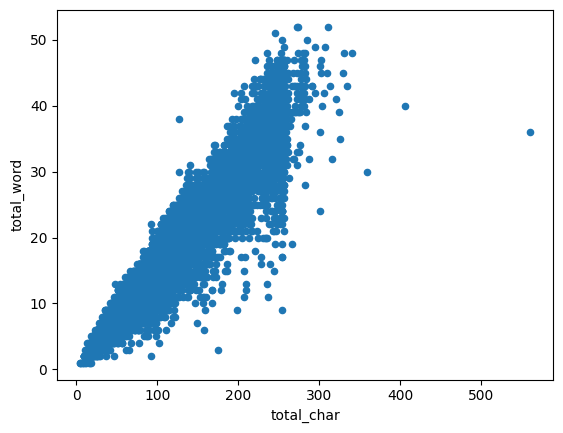

In [33]:
dfnum.plot(x='total_char', y='total_word', kind = 'scatter')

<Axes: xlabel='total_char', ylabel='total_word'>

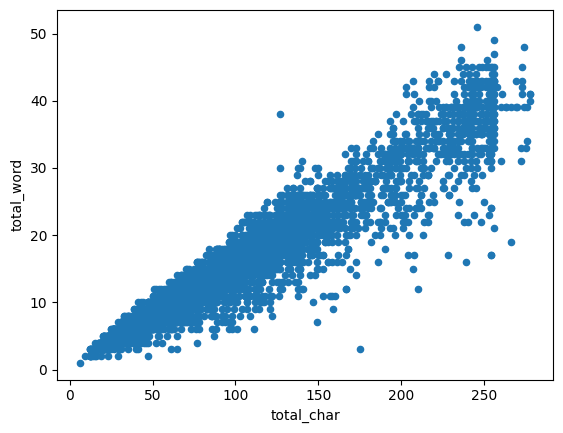

In [34]:
dfnum2.plot(x='total_char', y='total_word', kind = 'scatter')

<Axes: xlabel='total_word', ylabel='total_abusive_cleaned'>

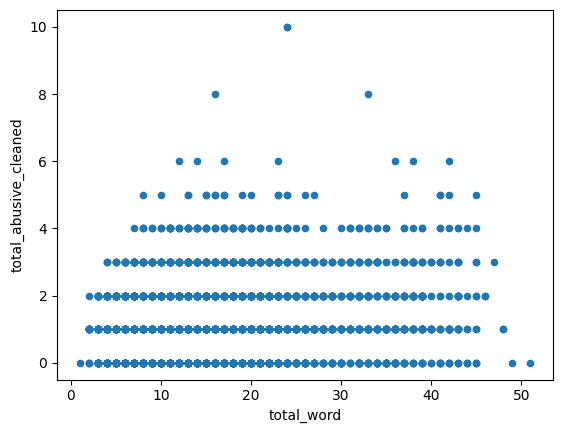

In [35]:
dfnum2.plot(x='total_word', y='total_abusive_cleaned', kind = 'scatter')

In [36]:
def hs_topic(data):
    if data['HS_Religion'] == 1:
        return 'Religion'
    elif data['HS_Race'] == 1:
        return 'Race'
    elif data['HS_Physical'] == 1:
        return 'Physical'
    elif data['HS_Gender'] == 1:
        return 'Gender'
    
def hs_target(data):
    if data['HS_Individual'] == 1:
        return 'Individual'
    elif data['HS_Group'] == 1:
        return 'Group'     

def hs_level(data):
    if data['HS_Weak'] == 1:
        return 'Weak'
    elif data['HS_Moderate'] == 1:
        return 'Moderate'
    elif data['HS_Strong'] == 1:
        return 'Strong'
    
    
df['HS_Topic'] = df.apply(hs_topic, axis=1)
df['HS_Target'] = df.apply(hs_target, axis=1)
df['HS_Level'] = df.apply(hs_level, axis=1)
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,...,HS_Strong,Tweet_Cleaned,total_char,total_word,total_char_cleaned,total_word_cleaned,total_abusive_cleaned,HS_Topic,HS_Target,HS_Level
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,...,0,semua berusaha melacak gue kamu lantas remehka...,138,25,85,14,1,None,Individual,Weak
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,...,0,telat memberi tau kamu sarap gue bergaul cigax...,120,21,69,12,1,None,None,None
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,...,0,41 aku berpikir aku tetap tuhan aku selalu jat...,254,37,169,27,0,None,None,None
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,...,0,aku aku ku tau matamu sipit mana aku,75,14,36,8,1,None,None,None
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,...,0,kaum cebong kafir awal tambah dungu haha,89,14,40,7,4,Religion,Group,Moderate


In [37]:
level_topic = pd.crosstab(df["HS_Level"], (df['HS_Topic']))
level_topic

HS_Topic,Gender,Physical,Race,Religion
HS_Level,,,,
Moderate,38,35,232,464
Strong,1,1,122,77
Weak,213,266,115,248


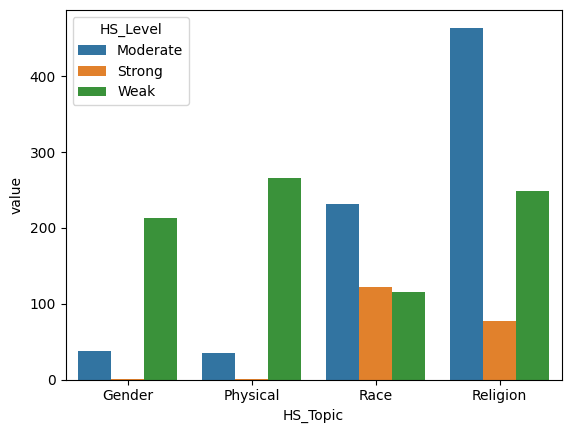

In [38]:
level_topic_show = level_topic.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=level_topic_show.HS_Topic, y=level_topic_show.value, hue=level_topic_show.HS_Level)
plt.show()

In [39]:
level_target = pd.crosstab(df["HS_Level"], (df['HS_Target']))
level_target

HS_Target,Group,Individual
HS_Level,,
Moderate,1698,0
Strong,280,192
Weak,0,3348


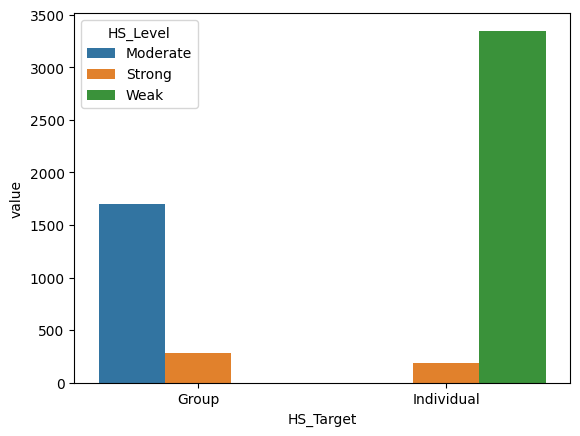

In [40]:
level_target_show = level_target.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=level_target_show.HS_Target, y=level_target_show.value, hue=level_target_show.HS_Level)
plt.show()

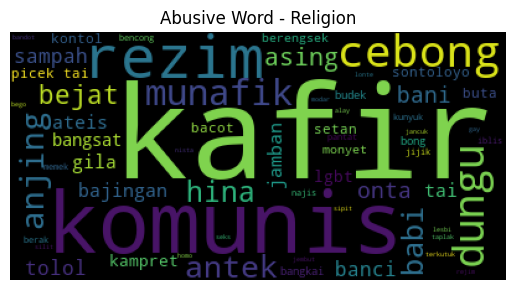

In [57]:
df_hs_religion = df.loc[df['HS_Religion'] == 1]

abusive_religion = [] 

for tweet in df_hs_religion['Tweet_Cleaned'].str.split():
    for word in tweet:
        if len(word) > 0 and word in abusive_list:
            abusive_religion.append(word)

text = ' '.join(abusive_religion)
wordcloud = WordCloud().generate(text)
plt.title('Abusive Word - Religion')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

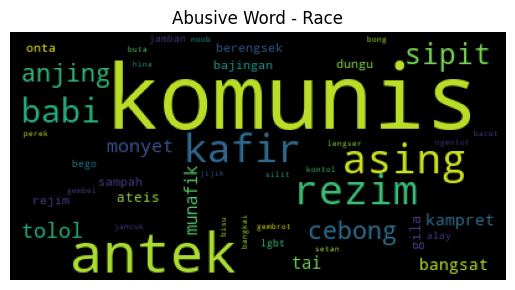

In [63]:
df_hs_race = df.loc[df['HS_Race'] == 1]

abusive_race = [] 

for tweet in df_hs_race['Tweet_Cleaned'].str.split():
    for word in tweet:
        if len(word) > 0 and word in abusive_list:
            abusive_race.append(word)

text = ' '.join(abusive_race)
wordcloud = WordCloud().generate(text)
plt.title('Abusive Word - Race')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

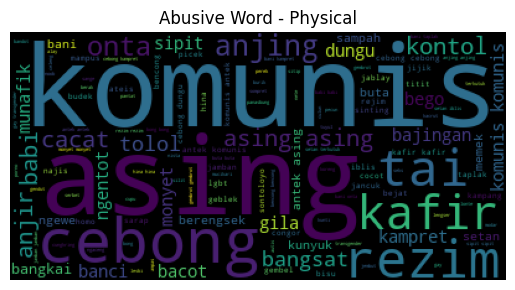

In [59]:
df_hs_physic = df.loc[df['HS_Physical'] == 1]

abusive_physic = [] 

for tweet in df['Tweet_Cleaned'].str.split():
    for word in tweet:
        if len(word) > 0 and word in abusive_list:
            abusive_physic.append(word)


text = ' '.join(abusive_physic)
wordcloud = WordCloud().generate(text)
plt.title('Abusive Word - Physical')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

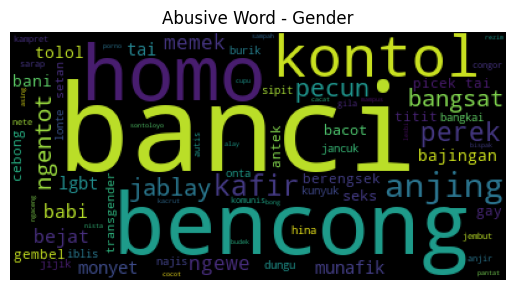

In [60]:
df_hs_gender = df.loc[df['HS_Gender'] == 1]

abusive_gender = [] 

for tweet in df_hs_gender['Tweet_Cleaned'].str.split():
    for word in tweet:
        if len(word) > 0 and word in abusive_list:
            abusive_gender.append(word)


text = ' '.join(abusive_gender)
wordcloud = WordCloud().generate(text)
plt.title('Abusive Word - Gender')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [61]:
abusive_words = [] 

for tweet in df['Tweet_Cleaned'].str.split():
    for word in tweet:
        if len(word) > 0 and word in abusive_list:
            abusive_words.append(word)

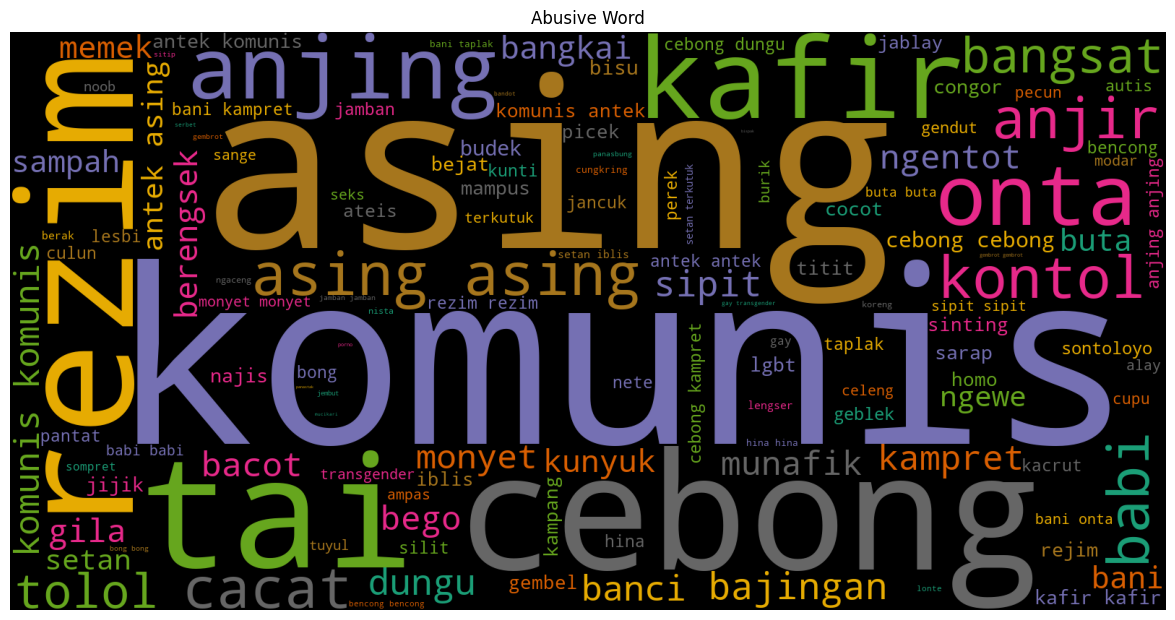

In [46]:
text = ' '.join(abusive_words)
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text)
plt.figure(figsize=(12, 6))
plt.title('Abusive Word')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()